# __The use of DEM data compared to synthetic data in LEMs: Study case on Teton Fault - Wyoming__

## Contents of this Notebook: 
- 1 Study Objectives
- 2 An Introduction to the Teton mountain range and fault 
- 3 Methods Description  
- 4 Longitudinal Profiles
- 5 Ksn and Chi
- 6 - Running the experiments with DEMs
- 7 - Running the experiments with synthetic data
- 8 - Comparing results
- 9 - Conclusion

Lets begin by importing the packages we will be using in this Notebook 

In [1]:
#import statements
import numpy as np
from landlab import RasterModelGrid, imshow_grid, imshow_grid_at_node
from landlab.components import FlowAccumulator, StreamPowerEroder, SteepnessFinder, ChiFinder, ChannelProfiler, DepressionFinderAndRouter
from landlab.io import write_esri_ascii
import matplotlib as plt
from bmi_topography import Topography
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt

__1. Study Objectives__ 
- To characterise the topography of catchments draining the Teton mountain range
- To simulate landscape evolution using a numerical model based on observations of the Teton
- To compare topographic observations of the natural Teton with synthetic numerical modelling  

__2. An Introduction to the Teton Mountain Range and Fault__

The Grand Teton Fault in Wyoming is a normal fault with a dip angle of approximately 50 degrees.

Using OpenToporgaphy we can visualise the topography of the Teton mountain range.

To access OpenTopography data and account and user API key are required. 

In [2]:
#Place your OpenTopogrpahy API key below in order to access data from OpenTopography 
API_key = "70aba841de85bd9dd906f616027b8d2c"

By specifying the coordinate extents of the site we are interested in visualing (north, east, south, west) we can import a DEM of our study region. 

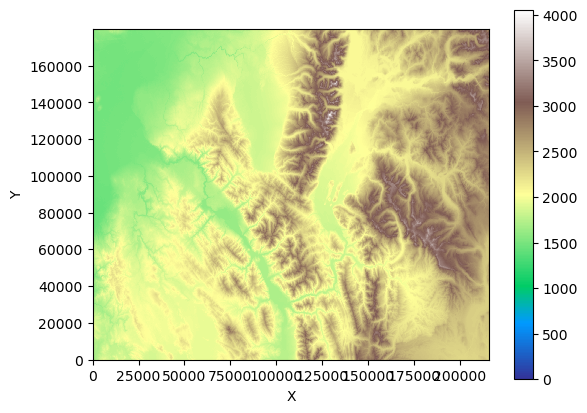

In [3]:
#This section is used to import open topography data for the study site the grand teton mountain range 
the_grand_teton = Topography(north=44, 
                             south=43, 
                             east=-110, 
                             west=-112,
                             output_format="GTiff",
                             dem_type="SRTMGL3", 
                             api_key=API_key)

the_grand_teton_DEM = the_grand_teton.load()
z = np.flipud(the_grand_teton_DEM.values.squeeze())

grid = RasterModelGrid(z.shape, xy_spacing=(90, 150)) #These values reflect a conversion for latitude 
grid.at_node["topographic__elevation"] = z

#Show the grid we have 
grid.imshow("topographic__elevation", cmap="terrain", vmin=0)

Now we will zoom into our study site by specifying more local coordinates of the catchments in the Teton we are interested.  

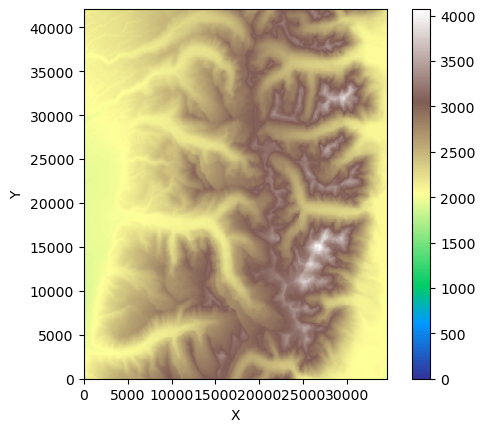

In [4]:
# This section is used to import open topography data for the study site the grand teton mountain range
the_grand_teton = Topography(north=43.891224,
                             south=43.657248, 
                             east=-110.731375, 
                             west=-111.051308, 
                             output_format="GTiff",
                             dem_type="SRTMGL1",
                             api_key= API_key)

the_grand_teton_DEM = the_grand_teton.load()
z = np.flipud(the_grand_teton_DEM.values.squeeze())

grid = RasterModelGrid(z.shape, xy_spacing=(30, 50)) #come back to this bit
grid.at_node["topographic__elevation"] = z/1000*1000

# Show the grid we have
grid.imshow("topographic__elevation", cmap="terrain", vmin=0)

### 3. Methods
*This section will briefly introduce each method used to analyse and compare the observed and synthetic landscapes* <-- Needs to be written
* Longitudinal profiles
* Channel Steepness (see review paper [Smith 2022](https://www.sciencedirect.com/science/article/pii/S001282522200054X))
* Chi [Royden 2000](https://scholar.google.com/citations?view_op=view_citation&hl=th&user=gfqeKSgAAAAJ&cstart=100&pagesize=100&sortby=pubdate&citation_for_view=gfqeKSgAAAAJ:nZcligLrVowC), [Harkins 2007](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2006JF000570), [Royden & Perron 2013](https://onlinelibrary.wiley.com/doi/full/10.1002/esp.3302)

__4 Topographic Analysis of the Teton__

Now we know what the Grand Teton looks like, we can begin our topographical analysis of the site. 

To do this we will focus on three tools for fluvial topogrpahic analysis: 
- A - The extraction of channel longitudinal profiles. 
- B - An anlysis of channel steepness; a metric that considers how steep any given channel is. 
- C - An analysis of channel chi; a metric that integrates channel flow distance and normalises for drainage area.

But first we must clip the DEM to a base level we define as 2100 m 

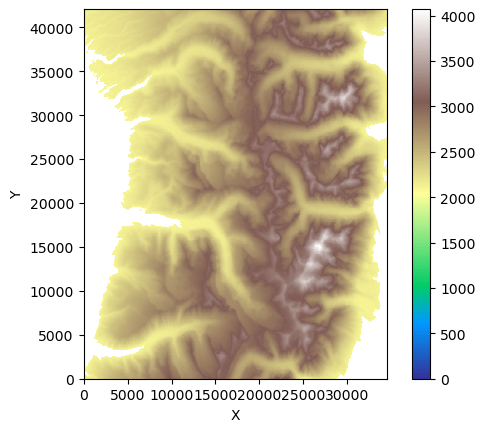

In [5]:
base_level = 2100

# Mask the grid nodes with the elevation less than 2100 m to set the base level elevation same for the all drainages for chi calculation
grid.status_at_node[grid.at_node["topographic__elevation"]<2100.0]=grid.BC_NODE_IS_CLOSED
grid.imshow("topographic__elevation", cmap="terrain", vmin=0,color_for_closed=None)

__A: Channel Longitudinal Profiles__

First we apply a flow accumulation component to our grid to consider the flow path of channels in our study site. We do this using the landlab FlowAccumulator component. 

We then use the landlab component ChannelProfiler to extract the channel longitudinal profiles. 

In [6]:
#Apply the FlowAccumulator 
#fa = FlowAccumulator(grid,flow_director='D8')
grid = DepressionFinderAndRouter(grid)
fa.run_one_step()

sf = SteepnessFinder(grid,reference_concavity=0.45,min_drainage_area=100000.0)
cf = ChiFinder(grid,reference_concavity=0.45,min_drainage_area=100000.0)


NameError: name 'fa' is not defined

__B: Normalised Channel Steepness__

__C: Chi__

__Numerical Modeling__

*Synthetic model group to add code/text here*

In [ ]:
# Turn into a function
def plot_topographic_metrics(grid_, channel_profiler_, time_, save=False):
    """ Produce a four-panel plot of topographic metrics for a landscape.
    (a) Elevation map
    (b) Chi map
    (c) Longitudinal profiles
    (d) Chi profiles
    Parameters:
    -----------------
    grid_: Landlab RasterModelGrid
    channel_profiler_: Landlab ChannelProfiler object
    time_: Age of the landscape in kyr
    save: Save the resulting figure as png in the current directory. Default is false
    Returns figure.
    """
    # Instantiate figure
    fig = plt.figure(figsize=(10, 10))
    shp = (3, 2)
    ax0 = plt.subplot2grid(shp, (0, 0), rowspan=1, colspan=1, aspect='auto')  # Topo with rivers
    ax1 = plt.subplot2grid(shp, (0, 1), rowspan=1, colspan=1, aspect='auto')  # Long profiles
    ax2 = plt.subplot2grid(shp, (1, 0), rowspan=1, colspan=1, aspect='auto')  # Chi map
    ax3 = plt.subplot2grid(shp, (1, 1), rowspan=1, colspan=1, aspect='auto')  # chi values
    ax4 = plt.subplot2grid(shp, (2, 0), rowspan=1, colspan=1, aspect='auto')  # steepness map
    # Colorbar axes
    divider0 = make_axes_locatable(ax0)
    cbar_ax0 = divider0.append_axes("left", size="5%", pad=0.5)
    divider2 = make_axes_locatable(ax2)
    cbar_ax2 = divider2.append_axes("left", size="5%", pad=0.5)
    divider4 = make_axes_locatable(ax4)
    cbar_ax4 = divider4.append_axes("left", size="5%", pad=0.5)
    cbar_ax4.yaxis.set_ticks_position('left')
    # # Axes ticks and labels
    # xticks = np.array([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000])
    # xlabels = [0, 2, 4, 6, 8, 10, 12, 14]
    # yticks = np.array([0, 2000, 4000, 6000, 8000, 10000])
    # ylabels = [0, 2, 4, 6, 8, 10]
    # Extract max dimensions from grid
    max_x = grid_.x_of_node[-1]
    max_y = grid_.y_of_node[-1]
    # Plot topography with long profiles
    im0 = ax0.imshow(grid_.at_node['topographic__elevation'].reshape(grid_.shape), aspect='auto', origin='lower',
                     cmap='terrain', extent=[0, max_x, 0, max_y])
    ax0.set_xlabel('Distance [m]'), ax0.set_ylabel('Distance [m]')
    # ax0.set_xticks(xticks, xlabels)
    # ax0.set_yticks(yticks, ylabels)
    ax0.yaxis.set_label_position("right")
    ax0.yaxis.tick_right()
    # Line segments for Long Profiles
    endpoints_only = False
    segments = []
    for nodes in channel_profiler_.nodes:
        if endpoints_only:
            select_nodes = [nodes[0], nodes[-1]]
            segments.append(list(zip(
                        grid_.x_of_node[select_nodes],
                        grid_.y_of_node[select_nodes])))
        else:
            segments.append(list(zip(grid_.x_of_node[nodes], grid_.y_of_node[nodes])))
    line_segments = LineCollection(segments)
    colors = channel_profiler_.colors
    line_segments.set_color(colors)
    ax0.add_collection(line_segments)
    # Add text
    ax0.text(0.5, 0.98, f'$\\tau$ = {time_} kyr', transform=ax0.transAxes, ha='center', va='top', bbox=dict(fc='w'))
    ax0.text(0.015, 0.98, 'a', transform=ax0.transAxes, ha='left', va='top', bbox=dict(fc='w'))
    cb0 = plt.colorbar(im0, cax=cbar_ax0, orientation='vertical', label='Elevation [m]')
    cb0.ax.yaxis.set_ticks_position('left'), cb0.ax.yaxis.set_label_position('left')
    # Plot long profiles
    plt.subplot(322)
    channel_profiler_.plot_profiles(xlabel='Upstream Distance [m]',
                      ylabel='Elevation [m]', title='Longitudinal Profiles')
    ax1.text(0.015, 0.98, 'b', transform=ax1.transAxes, ha='left', va='top', bbox=dict(fc='w'))
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    # Plot chi map
    im2 = ax2.imshow(grid_.at_node['channel__chi_index'].reshape(grid_.shape), aspect='auto', origin='lower',
                     cmap='jet', extent=[0, max_x, 0, max_y])
    ax2.set_xlabel('Distance [m]'), ax2.set_ylabel('Distance [m]')
    # ax2.set_xticks(xticks, xlabels)
    # ax2.set_yticks(yticks, ylabels)
    ax2.text(0.015, 0.98, 'c', transform=ax2.transAxes, ha='left', va='top', bbox=dict(fc='w'))
    cb2 = plt.colorbar(im2, cax=cbar_ax2, label='Chi index', orientation='vertical')
    cb2.ax.yaxis.set_ticks_position('left'), cb2.ax.yaxis.set_label_position('left')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    # Plot chi profiles
    plt.subplot(324)
    for i, outlet_id in enumerate(channel_profiler_.data_structure):
        for j, segment_id in enumerate(channel_profiler_.data_structure[outlet_id]):
            if j == 0:
                label = f"channel {i + 1}"
            else:
                label = "_nolegend_"
            segment = channel_profiler_.data_structure[outlet_id][segment_id]
            profile_ids = segment["ids"]
            color = segment["color"]
            plt.plot(
                grid_.at_node["channel__chi_index"][profile_ids],
                grid_.at_node["topographic__elevation"][profile_ids],
                color=color,
                label=label,
            )
    ax3.set_xlabel("Chi Index [m]")
    ax3.set_ylabel("Elevation [m]")
    ax3.text(0.015, 0.98, 'd', transform=ax3.transAxes, ha='left', va='top', bbox=dict(fc='w'))
    ax3.yaxis.set_label_position("right")
    ax3.yaxis.tick_right()
    # Plot channel steepness
    im4 = ax4.imshow(grid_.at_node['channel__steepness_index'].reshape(grid_.shape), origin='lower', aspect='auto',
                    cmap='jet', extent=[0, max_x, 0, max_y])
    ax4.set_xlabel('Distance [m]'), ax4.set_ylabel('Distance [m]')
    # ax4.set_xticks(xticks, xlabels)
    # ax4.set_yticks(yticks, ylabels)
    ax4.text(0.015, 0.98, 'e', transform=ax4.transAxes, ha='left', va='top', bbox=dict(fc='w'))
    cb4 = plt.colorbar(im4, cax=cbar_ax4, label='Steepness index', orientation='vertical')
    cb4.ax.yaxis.set_ticks_position('left'), cb4.ax.yaxis.set_label_position('left')
    ax4.yaxis.set_label_position("right")
    ax4.yaxis.tick_right()
    plt.tight_layout()
    if save:
        plt.savefig('synthetic_results_' + time_ +'.png', dpi=300)
    return None